# Fundamentos de Spark y Python — Laboratorio con DataFrames (Walmart Stock)

**Curso:** Data Science Sección 20

**Duración estimada:** 1.5–2.5 horas

**Modalidad:** Individual (colaboración para dudas conceptuales permitida, entrega individual)

## Objetivos de aprendizaje
Al finalizar, podrá:
1. Iniciar una **SparkSession** y trabajar con **PySpark DataFrames**.
2. **Cargar** un CSV con encabezados e inferencia de tipos.
3. Explorar estructura: **columnas**, **esquema** y **muestras**.
4. Ejecutar **descriptivos** y agregaciones.
5. Aplicar **filtros**, **transformaciones** y **creación de columnas**.
6. Calcular medidas estadísticas (p. ej., **correlación de Pearson**).
7. Realizar consultas **temporales** (día con máximo precio; máximos por año).
8. Comunicar hallazgos de forma ordenada y reproducible.


## Datos
- **Archivo:** `walmart_stock.csv`
- **Periodo:** 2012–2017
- **Columnas típicas:** `Date`, `Open`, `High`, `Low`, `Close`, `Volume`, `Adj Close`

> *Nota:* No modifique el CSV; todas las transformaciones se realizan en el notebook.


## Requisitos previos
- Python 3.9+ (o entorno equivalente en **Google Colab**)
- **Apache Spark 3.x** con PySpark (o `pyspark` preinstalado en Colab)
- Conocimientos básicos de: tipos de datos, funciones de agregación, y uso de notebooks.


## Entregables
1. **Notebook ejecutado** (`.ipynb`) con todas las celdas y salidas visibles.
2. **Conclusiones breves** (5–10 líneas) al final del notebook con interpretaciones clave.
3. Código **comentado** y ordenado.

**Formato de entrega:** Subir `.ipynb` .


## 1) Configuración del entorno
**Opción A — Local:**
```python
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName("Lab Spark DF — Walmart") \
    .getOrCreate()
print("Spark version:", spark.version)
```

**Opción B — Colab (sugerida si no tiene Spark local):**
```python
!pip -q install pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Lab Spark DF — Walmart").getOrCreate()
print("Spark version:", spark.version)
```


## 2) Tareas (complete en orden y deje **toda** la evidencia en el notebook)

### 2.1 Inicie una sesión de Spark (si no está iniciada)

In [1]:
!pip -q install pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Lab Spark DF — Walmart").getOrCreate()
print("Spark version:", spark.version)

Spark version: 3.5.1


### 2.2 Cargue el archivo CSV

In [2]:
df = spark.read.csv('walmart_stock.csv', header=True, inferSchema=True)

### 2.3 ¿Cuáles son los nombres de las columnas?

In [3]:
print(df.columns)

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']


### 2.4 Muestre el **esquema** de los datos

In [4]:
df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



### 2.5 Muestre las **primeras 5 filas**

In [5]:
df.show(5)

+----------+------------------+---------+---------+------------------+--------+------------------+
|      Date|              Open|     High|      Low|             Close|  Volume|         Adj Close|
+----------+------------------+---------+---------+------------------+--------+------------------+
|2012-01-03|         59.970001|61.060001|59.869999|         60.330002|12668800|52.619234999999996|
|2012-01-04|60.209998999999996|60.349998|59.470001|59.709998999999996| 9593300|         52.078475|
|2012-01-05|         59.349998|59.619999|58.369999|         59.419998|12768200|         51.825539|
|2012-01-06|         59.419998|59.450001|58.869999|              59.0| 8069400|          51.45922|
|2012-01-09|         59.029999|59.549999|58.919998|             59.18| 6679300|51.616215000000004|
+----------+------------------+---------+---------+------------------+--------+------------------+
only showing top 5 rows



### 2.6 Descriptivos con `describe()` + interpretación

In [6]:
df.describe().show()

+-------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+
|summary|              Open|             High|              Low|            Close|           Volume|        Adj Close|
+-------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+
|  count|              1258|             1258|             1258|             1258|             1258|             1258|
|   mean| 72.35785375357709|72.83938807631165| 71.9186009594594|72.38844998012726|8222093.481717011|67.23883848728146|
| stddev|  6.76809024470826|6.768186808159218|6.744075756255496|6.756859163732991|  4519780.8431556|6.722609449996857|
|    min|56.389998999999996|        57.060001|        56.299999|        56.419998|          2094900|        50.363689|
|    max|         90.800003|        90.970001|            89.25|        90.470001|         80898100|84.91421600000001|
+-------+------------------+-----------------+--

*(Escriba aquí sus interpretaciones de al menos dos métricas de `describe()`)*

### 2.7 Máximo y mínimo de `Volume`

In [7]:
from pyspark.sql.functions import max, min
df.select(max("Volume").alias("Max_Volume"), min("Volume").alias("Min_Volume")).show()

+----------+----------+
|Max_Volume|Min_Volume|
+----------+----------+
|  80898100|   2094900|
+----------+----------+



### 2.8 ¿Cuántos días tuvieron `Close < 60`?

In [8]:
df.filter(df["Close"] < 60).count()

81

### 2.9 Crée la columna `Tasa_HV = High/Volume`

In [9]:
from pyspark.sql.functions import col
df = df.withColumn("Tasa_HV", col("High") / col("Volume"))
df.select("Date", "High", "Volume", "Tasa_HV").show(5)

+----------+---------+--------+--------------------+
|      Date|     High|  Volume|             Tasa_HV|
+----------+---------+--------+--------------------+
|2012-01-03|61.060001|12668800|4.819714653321546E-6|
|2012-01-04|60.349998| 9593300|6.290848613094555E-6|
|2012-01-05|59.619999|12768200|4.669412994783916E-6|
|2012-01-06|59.450001| 8069400|7.367338463826307E-6|
|2012-01-09|59.549999| 6679300|8.915604778943901E-6|
+----------+---------+--------+--------------------+
only showing top 5 rows



### 2.10 ¿Qué porcentaje del tiempo `High > 80`?

In [10]:
total_count = df.count()
high_gt_80_count = df.filter(df["High"] > 80).count()
porcentaje = (high_gt_80_count / total_count) * 100
print(f"Porcentaje de días con High > 80: {porcentaje:.2f}%")


Porcentaje de días con High > 80: 9.14%


### 2.11 Correlación de Pearson entre `High` y `Volume` + interpretación

In [11]:
df.stat.corr("High", "Volume")

-0.3384326061737161

*(Escriba aquí una interpretación breve del signo y magnitud de la correlación)*

### 2.12 ¿Qué día tuvo el **precio más alto** (`High`)? Devuelva la fila completa

In [12]:
df.orderBy(df["High"].desc()).show(1)

+----------+---------+---------+-----+---------+-------+---------+--------------------+
|      Date|     Open|     High|  Low|    Close| Volume|Adj Close|             Tasa_HV|
+----------+---------+---------+-----+---------+-------+---------+--------------------+
|2015-01-13|90.800003|90.970001|88.93|89.309998|8215400|83.825448|1.107310672639189...|
+----------+---------+---------+-----+---------+-------+---------+--------------------+
only showing top 1 row



### 2.13 **Media** de la columna `Close`

In [13]:
from pyspark.sql.functions import avg
df.select(avg("Close").alias("Media_Close")).show()

+-----------------+
|      Media_Close|
+-----------------+
|72.38844998012726|
+-----------------+



### 2.14 **Máximo `High` por año**

In [14]:
from pyspark.sql.functions import year
df = df.withColumn("Year", year("Date"))
df.groupBy("Year").max("High").orderBy("Year").show()

+----+---------+
|Year|max(High)|
+----+---------+
|2012|77.599998|
|2013|81.370003|
|2014|88.089996|
|2015|90.970001|
|2016|75.190002|
+----+---------+



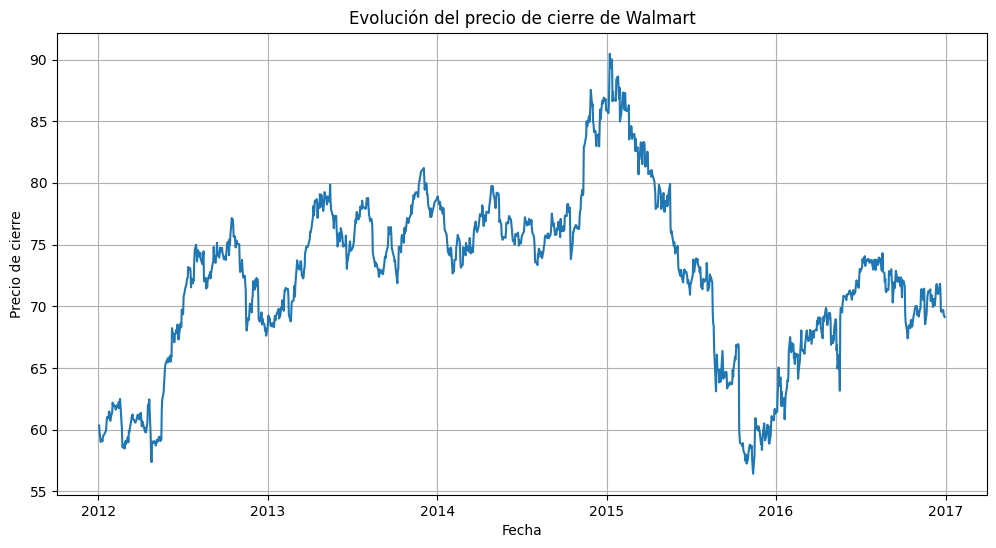

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

pdf = df.select("Date", "Close").toPandas()
pdf["Date"] = pd.to_datetime(pdf["Date"])
plt.figure(figsize=(12,6))
plt.plot(pdf["Date"], pdf["Close"])
plt.title("Evolución del precio de cierre de Walmart")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre")
plt.grid(True)
plt.show()

## 3) Conclusiones (5–10 líneas)

*Escriba aquí sus principales hallazgos e interpretaciones.*

## Buenas prácticas
- Comente bloques no triviales.
- Nombres de variables **claros** (`df_prices`, `max_high_year`, etc.).
- Reutilice resultados intermedios para evitar recalcular.
- Si usa Colab, fije versiones cuando sea necesario.
- Cierre la sesión de Spark al final si corre local: `spark.stop()`.


## Errores comunes
- Olvidar `inferSchema=True` → todo se carga como `string`.
- Mezclar API RDD con DataFrames sin necesidad.
- Usar funciones de Python puras en `withColumn` (use `pyspark.sql.functions`).
- Intentar graficar DataFrames de Spark directamente: primero **convierta** a Pandas con `.toPandas()` en subconjuntos pequeños.


## Rúbrica de evaluación (100 puntos)
**A. Preparación del ambiente** (10 pts)
- (10) SparkSession creada sin errores; versiones y entorno claros.

**B. Carga y documentación de datos** (15 pts)
- (8) CSV cargado con `header` y `inferSchema` correctos.
- (7) Comentarios breves sobre las columnas y supuestos.

**C. Exploración básica** (10 pts)
- (4) Lista de columnas.
- (3) `printSchema()` bien interpretado.
- (3) `show(5)` con observaciones puntuales.

**D. Descriptivos** (10 pts)
- (6) `describe()` ejecutado y leído correctamente.
- (4) Al menos 2 interpretaciones numéricas.

**E. Agregaciones y filtros** (10 pts)
- (5) Máx./mín. de `Volume` correctos.
- (5) Conteo de días con `Close < 60` correcto.

**F. Ingeniería de características** (10 pts)
- (8) Columna `Tasa_HV = High/Volume` correcta y con tipo numérico.
- (2) Justificación breve del indicador.

**G. Métricas estadísticas** (10 pts)
- (7) Correlación `High`–`Volume` calculada.
- (3) Interpretación del valor (signo y magnitud).

**H. Consultas temporales** (10 pts)
- (5) Día con `High` máximo identificado.
- (5) Máximo `High` por año con agrupación y orden correctos.

**I. Comunicación de resultados** (10 pts)
- (6) Conclusiones finales claras y concisas (5–10 líneas).
- (4) Orden, legibilidad y limpieza del notebook.

**J. Estilo y calidad de código** (5 pts)
- (5) Convenciones PEP8 razonables, nombres significativos y ausencia de código muerto.

> **Total: 100 puntos**
